<a href="https://colab.research.google.com/github/ShaliniR8/lahman-mlb/blob/main/batting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture 
!wget https://github.com/ShaliniR8/lahman-mlb/raw/main/baseballdatabank_2022.zip
!unzip baseballdatabank_2022.zip 

In [ ]:
path = '/content/baseballdatabank-2022.2/core/'

In [ ]:
import pandas as pd
batting = pd.read_csv( path + "Batting.csv")
teams = pd.read_csv( path + "Teams.csv")
people = pd.read_csv( path + 'People.csv')

In [ ]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110495 entries, 0 to 110494
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   playerID  110495 non-null  object 
 1   yearID    110495 non-null  int64  
 2   stint     110495 non-null  int64  
 3   teamID    110495 non-null  object 
 4   lgID      109758 non-null  object 
 5   G         110495 non-null  int64  
 6   AB        110495 non-null  int64  
 7   R         110495 non-null  int64  
 8   H         110495 non-null  int64  
 9   2B        110495 non-null  int64  
 10  3B        110495 non-null  int64  
 11  HR        110495 non-null  int64  
 12  RBI       109739 non-null  float64
 13  SB        108127 non-null  float64
 14  CS        86954 non-null   float64
 15  BB        110495 non-null  int64  
 16  SO        108395 non-null  float64
 17  IBB       73845 non-null   float64
 18  HBP       107679 non-null  float64
 19  SH        104427 non-null  float64
 20  SF  

In [ ]:
# drop columns not needed
drop = ['lgID']
batting = batting.drop(columns = drop)

In [ ]:
batting.shape

(110495, 21)

In [ ]:
# get stats from previous year than the one being predicted
join = ['teamID', 'playerID']
batting_join_outer = pd.merge(batting, batting, how = 'outer', left_on=join, right_on=join)

In [ ]:
batting_join_outer.shape

(476577, 40)

In [ ]:
curr_year = batting_join_outer['yearID_x']
prev_year = batting_join_outer['yearID_y']
batting_join_prev_year = batting_join_outer[curr_year == prev_year + 1]

In [ ]:
cols_left = [ col for col in batting_join_prev_year.columns.to_list() if '_x' in col ]
cols_left.remove('yearID_x')
batting_join_prev_year = batting_join_prev_year.drop(columns = cols_left)

In [ ]:
batting_join_prev_year.head()

,playerID,yearID_x,teamID,yearID_y,stint_y,G_y,AB_y,R_y,H_y,2B_y,...,RBI_y,SB_y,CS_y,BB_y,SO_y,IBB_y,HBP_y,SH_y,SF_y,GIDP_y
4,allisar01,1872,CL1,1871,1,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
15,barnero01,1872,BS1,1871,1,31,157,66,63,10,...,34.0,11.0,6.0,13,1.0,NaN,NaN,NaN,NaN,1.0
21,barnero01,1873,BS1,1872,1,45,230,81,99,28,...,44.0,12.0,2.0,9,4.0,NaN,NaN,NaN,NaN,3.0
27,barnero01,1874,BS1,1873,1,60,320,125,138,31,...,60.0,43.0,6.0,20,2.0,NaN,NaN,NaN,NaN,1.0
33,barnero01,1875,BS1,1874,1,51,259,72,88,12,...,39.0,8.0,7.0,8,2.0,NaN,NaN,NaN,NaN,1.0


In [ ]:
birthYear = people[['playerID', 'birthYear']]
batting_join_prev_year = pd.merge(batting_join_prev_year, birthYear, left_on = ['playerID'], right_on = ['playerID'])
batting_join_prev_year.head()

,playerID,yearID_x,teamID,yearID_y,stint_y,G_y,AB_y,R_y,H_y,2B_y,...,SB_y,CS_y,BB_y,SO_y,IBB_y,HBP_y,SH_y,SF_y,GIDP_y,birthYear
0,allisar01,1872,CL1,1871,1,29,137,28,40,4,...,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0,1849.0
1,barnero01,1872,BS1,1871,1,31,157,66,63,10,...,11.0,6.0,13,1.0,NaN,NaN,NaN,NaN,1.0,1850.0
2,barnero01,1873,BS1,1872,1,45,230,81,99,28,...,12.0,2.0,9,4.0,NaN,NaN,NaN,NaN,3.0,1850.0
3,barnero01,1874,BS1,1873,1,60,320,125,138,31,...,43.0,6.0,20,2.0,NaN,NaN,NaN,NaN,1.0,1850.0
4,barnero01,1875,BS1,1874,1,51,259,72,88,12,...,8.0,7.0,8,2.0,NaN,NaN,NaN,NaN,1.0,1850.0


In [ ]:
batting_join_prev_year['batterAge'] = (batting_join_prev_year['yearID_x'] - batting_join_prev_year['birthYear'])
batting_join_prev_year = batting_join_prev_year.drop(columns = ['birthYear'])
batting_join_prev_year.head() 

,playerID,yearID_x,teamID,yearID_y,stint_y,G_y,AB_y,R_y,H_y,2B_y,...,SB_y,CS_y,BB_y,SO_y,IBB_y,HBP_y,SH_y,SF_y,GIDP_y,batterAge
0,allisar01,1872,CL1,1871,1,29,137,28,40,4,...,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0,23.0
1,barnero01,1872,BS1,1871,1,31,157,66,63,10,...,11.0,6.0,13,1.0,NaN,NaN,NaN,NaN,1.0,22.0
2,barnero01,1873,BS1,1872,1,45,230,81,99,28,...,12.0,2.0,9,4.0,NaN,NaN,NaN,NaN,3.0,23.0
3,barnero01,1874,BS1,1873,1,60,320,125,138,31,...,43.0,6.0,20,2.0,NaN,NaN,NaN,NaN,1.0,24.0
4,barnero01,1875,BS1,1874,1,51,259,72,88,12,...,8.0,7.0,8,2.0,NaN,NaN,NaN,NaN,1.0,25.0


In [ ]:
cols = batting_join_prev_year.columns.to_list()
cols.remove('playerID')
cols.remove('yearID_y')
cols.remove('teamID')
cols.remove('yearID_x')
avgs = batting_join_prev_year.groupby(['teamID', 'yearID_x'])[cols].mean().reset_index()
medians = batting_join_prev_year.groupby(['teamID', 'yearID_x'])[cols].median().reset_index()

In [ ]:
# teams_o = teams

In [ ]:
teams = teams_o

In [ ]:
teams = teams[['yearID', 'teamID', 'W', 'L']].copy()
win_perc = teams['W'] / (teams['W'] + teams['L'])
teams['win_perc']  = win_perc
teams = teams.drop(columns = ['W', 'L'])

In [ ]:
teams = teams[teams['yearID'] > min(teams['yearID'])]

In [ ]:
teamBatterAvgs = pd.merge(teams, avgs, left_on = ['yearID', 'teamID'], right_on = ['yearID_x', 'teamID'])
teamBatterAvgs = teamBatterAvgs.drop(columns = ['yearID_x'])
teamBatterMeds = pd.merge(teams, medians, left_on = ['yearID', 'teamID'], right_on = ['yearID_x', 'teamID'])
teamBatterMeds = teamBatterMeds.drop(columns = ['yearID_x'])

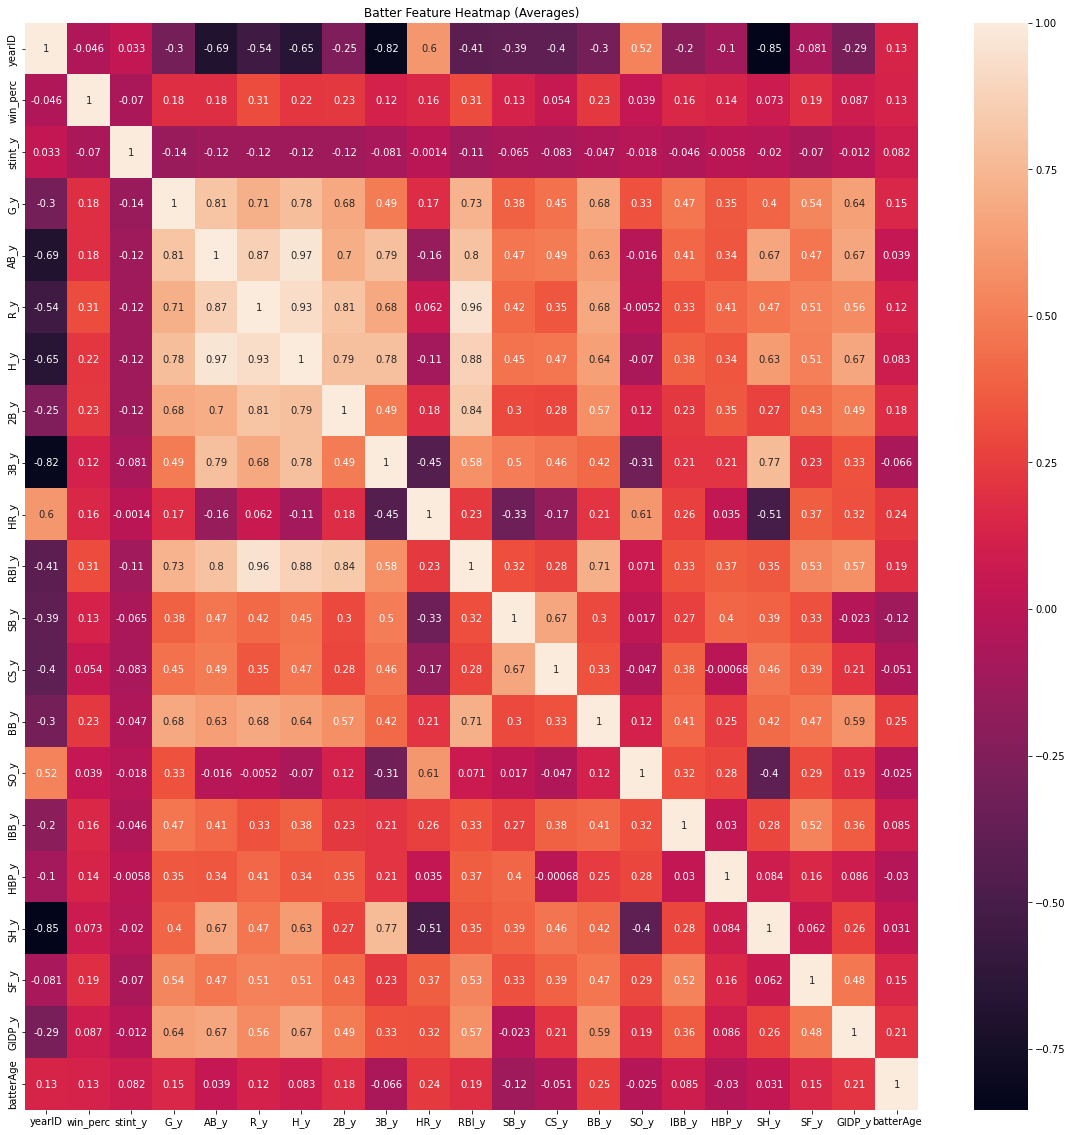

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 20))
sns.heatmap(teamBatterAvgs.corr(method = 'spearman'), annot=True)
plt.title('Batter Feature Heatmap (Averages)')
plt.savefig('fig3.jpg')
plt.show()

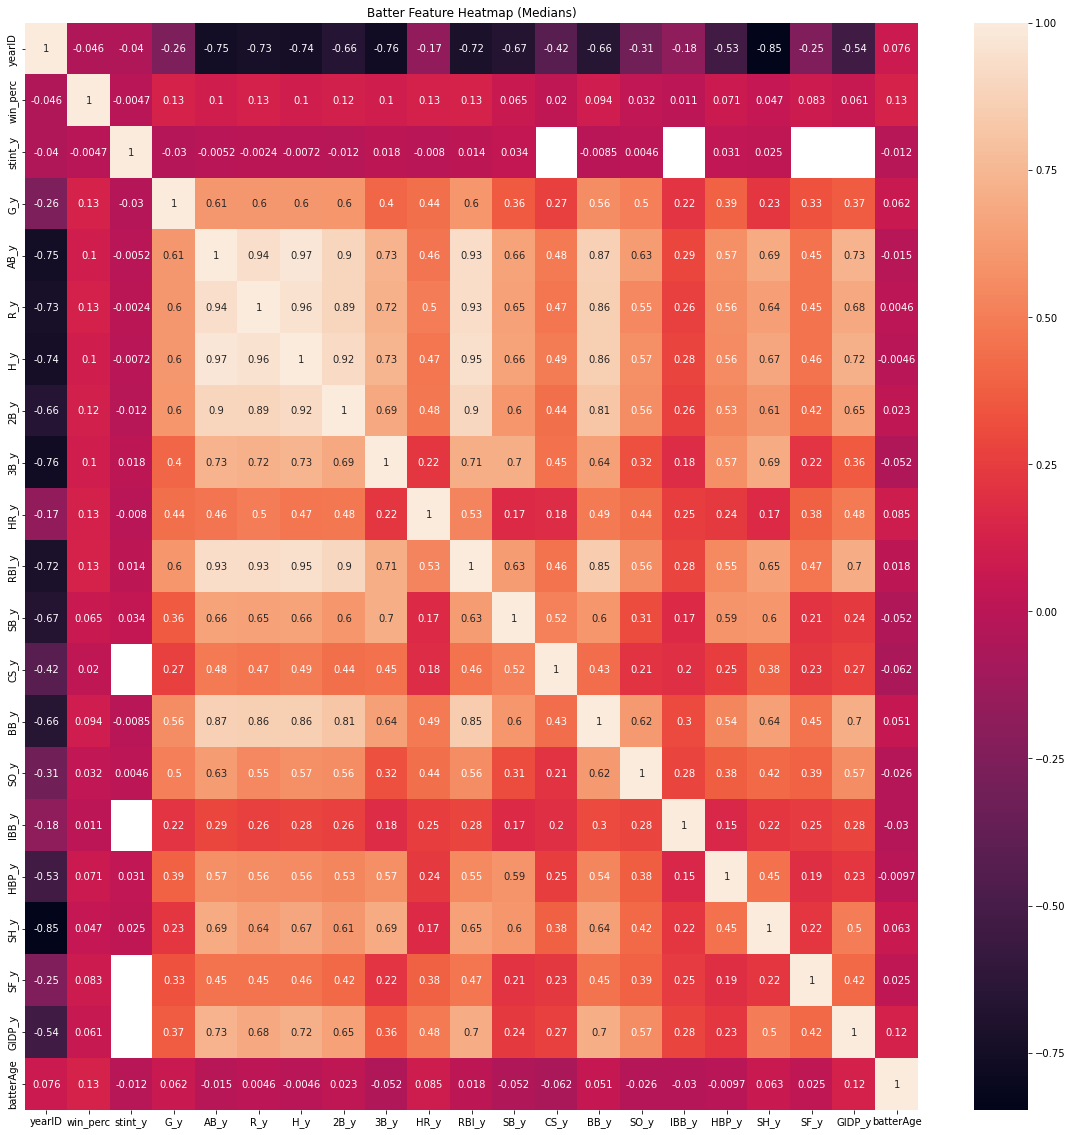

In [ ]:
plt.figure(figsize = (20, 20))
sns.heatmap(teamBatterMeds.corr(method = 'spearman'), annot=True)
plt.title('Batter Feature Heatmap (Medians)')
plt.savefig('fig4.jpg')
plt.show()